### P A R s

In [18]:
WDIR = '~/git/seminars/Siti_Contaminati/';
load( fullfile(WDIR,'geotables.mat'), 'T' )

In [42]:
% ____Geostatistical Conditional Simulation____
%   <L1>
ChEl        = 'Chrome';
NSIM        = 200;
opt         = strcat( 'empty2NaN' );
L           = 1;% for loop on L = 1:3 !!
gcs.L       = greadtext( fullfile(WDIR,['L',num2str(L),'_gcs_raw.txt']), ',', '', '"', opt );

In [43]:
Easting     = cae(gcs.L,1);
Northing    = cae(gcs.L,2);
gcssim      = 1;% for loop on gcssim = 1:NSIM
%eval( ['GCSMAP = cell2mat(gcs.L',num2str(L),'(2:end,2+gcssim));'] )% +2 :: ~Easting+Northing
GCSMAP      = cae(gcs.L,2+gcssim);

SIMs        = cae(gcs.L,3:NSIM+2);

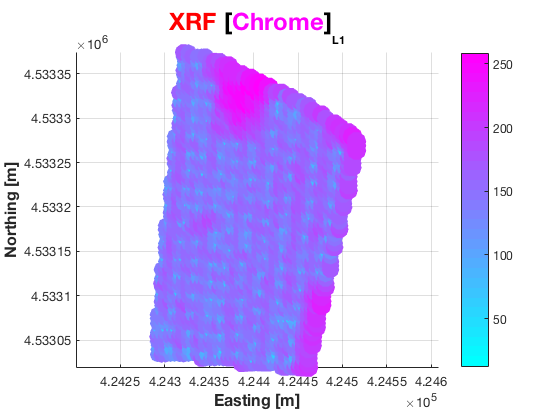

In [53]:
xylabfs = 12;
%% --------- spread on GCS maps
MED = median(SIMs,2);
MEA = mean(SIMs,2);
STD = std(SIMs,[],2);
SumSim = sum( SIMs, 2 );

% S C A T T E R
MAP2PLOT = STD;
Idepths = (T(1).xrf_limsup + T(1).xrf_liminf) / 2;
Zm = zeros(size(GCSMAP)) + Idepths(L);
figure
% scatter3( Easting, Northing, -Zm(:), SumSim,SumSim, 'filled' )
scatter3( Easting, Northing, -Zm(:), MAP2PLOT,MAP2PLOT, 'filled' )
colormap(cool(32)), colorbar
title(['\fontsize{18}\color{red}XRF \color{black}[\color{magenta}',ChEl,...
       '\color{black}]\fontsize{10}_{L',num2str(L),'}'],'FontWeight','b','FontSize',22)
xlabel('Easting [m]','FontWeight','b','FontSize',xylabfs),
ylabel('Northing [m]','FontWeight','b','FontSize',xylabfs),
zlabel('Depth [mm]','FontWeight','b','FontSize',xylabfs)
view(2),axis equal

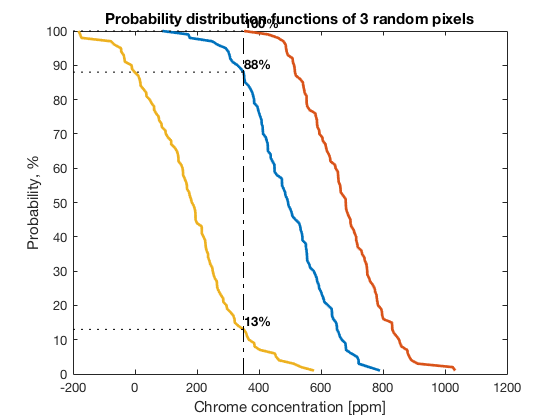

In [50]:
%% --------- Probability distribution function
%% ----------- ___PIXEL___
% ____pars____________
THRESHOLD = 350;
ROW = [12,1492,1977];
% ____pars____________
pixel = SIMs(ROW,1:100);
figure(6),clf,plot(sort(pixel,2,'descend'),1:100, 'LineWidth',2)
% cAX = axis; cAX(1)=0; axis(cAX);
cAX=axis;
title('Probability distribution functions of 3 random pixels')
ylabel('Probability, %')
xlabel( [ChEl,' concentration [ppm]'] )

hold on, line([THRESHOLD,THRESHOLD],[0,100],'LineStyle','-.','color','k'), hold off

Pr = sum(pixel>=THRESHOLD,2) / size(pixel,2) * 100;
% hold on, line(repmat([cAX(1),THRESHOLD],3,1),[Pr,Pr],'color','k'), hold off
hold on
for ii = 1:numel(ROW)
    if Pr(ii)==0, continue, end
    line([cAX(1),THRESHOLD],[Pr(ii),Pr(ii)],'LineStyle',':','color','k')
    text(THRESHOLD,Pr(ii),[num2str(Pr(ii)),'%'],'HorizontalAlignment','left','VerticalAlignment','bottom','FontWeight','b')
end
hold off

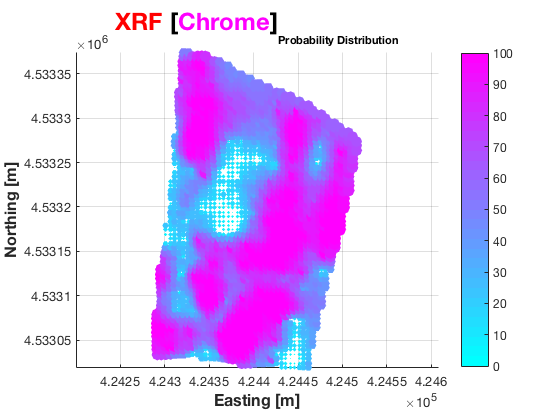

In [52]:
%% ----------- ___MAP___
% ____pars____________
THRESHOLD = 350;
% ____pars____________
Pr = sum(SIMs>=THRESHOLD,2) / size(SIMs,2) * 100;

% S C A T T E R
MAP2PLOT = Pr;
Idepths = (T(1).xrf_limsup + T(1).xrf_liminf) / 2;
Zm = zeros(size(GCSMAP)) + Idepths(L);
figure(9)
% scatter3( Easting, Northing, -Zm(:), SumSim,SumSim, 'filled' )
scatter3( Easting, Northing, -Zm(:), MAP2PLOT+0.1,MAP2PLOT, 'filled' )
colormap(cool(32)), colorbar
title(['\fontsize{18}\color{red}XRF \color{black}[\color{magenta}',ChEl,...
       '\color{black}]\fontsize{10}_{Probability Distribution}'],'FontWeight','b','FontSize',22)
xlabel('Easting [m]','FontWeight','b','FontSize',xylabfs),
ylabel('Northing [m]','FontWeight','b','FontSize',xylabfs),
zlabel('Depth [mm]','FontWeight','b','FontSize',xylabfs)
view(2),axis equal